# STATS 604: Bananas

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [183]:
raw = cv2.imread("/Users/yppatel/Documents/PhD_Year2_Fall/STATS_604/SquishTest/before/banana_2.jpeg")

In [184]:
img = cv2.resize(raw, None, fx=0.15, fy=0.15)
img = cv2.blur(img, (5,5)) 

In [185]:
W, H, _ = img.shape
blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(W, H), swapRB=False, crop=False)
net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "hed_pretrained_bsds.caffemodel")

In [186]:
net.setInput(blob)
hed = net.forward()

In [187]:
hed = cv2.resize(hed[0, 0], (W, H))
hed = (255 * hed).astype("uint8")

In [188]:
t = 0
mask = hed.copy()
mask[mask == t] = 0
mask[mask > t] = 255

mask[:, :200] = 0
mask[:, 400:] = 0
mask[:200, :] = 0
mask[350:, :] = 0

kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(mask, kernel, iterations=10)
mask = cv2.erode(img_dilation, kernel, iterations=10)

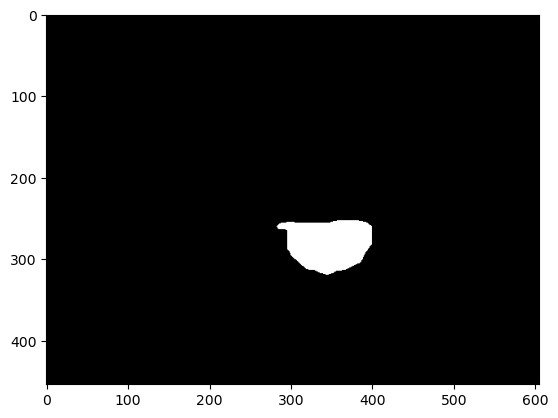

In [189]:
plt.imshow(mask, cmap='gray')

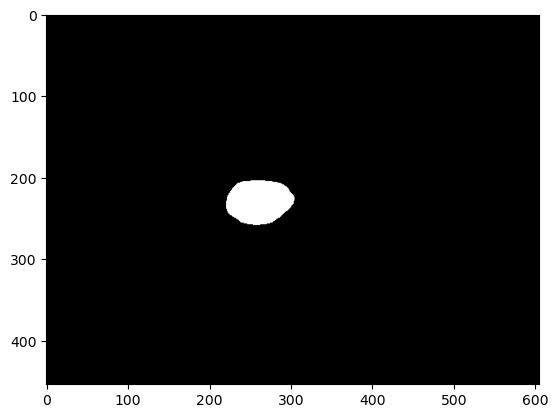

In [161]:
cv2.floodFill(mask, None, seedPoint=(225, 225), newVal=255)
plt.imshow(mask, cmap='gray')